# Data Analysis and Computation in Neuroscience

# Genetic Anatomy Exercises

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
sns.set(font_scale=1.5)

### Load a dataset for genetic anatomy from the Allen Institute

In [4]:
# Load a dataset that contains gene expression levels (counts of RNA corresponding to each gene in the human genome) 
# for many different brain areas
url = 'http://github.com/rgerkin/neuro-data-analysis-course/raw/master/data/rnaseq_donor9861/RNAseqTPM.csv'
df_data = pd.read_csv(url, header=None, index_col=0) # Header=None says not to give the columns any names (for now)
                                                # index_col=0 says to use the very first column as the index (row names)
df_data.index.name = 'gene' # Give the index a name, i.e. say what is being shown in the row labels
df_data.head()

,1,2,3,4,5,6,7,8,9,10,...,112,113,114,115,116,117,118,119,120,121
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,3.161960e-06,3.258536e-06,2.641817e-06,3.108662e-06,4.039857e-06,4.333618e-06,4.025451e-06,2.974454e-06,1.881650e-06,4.345292e-06,...,3.453082e-06,4.187005e-06,4.811023e-06,4.161573e-06,6.538805e-06,0.000004,1.079617e-05,5.867319e-06,1.046644e-05,5.198772e-06
A1BG-AS1,5.178069e-06,4.948610e-06,4.238131e-06,4.075050e-06,4.467568e-06,1.745767e-06,5.223524e-06,3.281134e-06,2.337282e-06,3.452217e-06,...,7.639799e-06,5.353240e-06,6.806401e-06,6.018209e-06,2.411404e-06,0.000003,1.581258e-06,9.329990e-07,5.893017e-07,9.203809e-07
A1CF,3.544914e-08,2.427387e-08,6.535814e-08,1.612159e-08,5.255629e-08,2.913073e-08,1.196508e-08,0.000000e+00,0.000000e+00,2.335678e-08,...,1.641368e-07,1.283257e-07,1.290715e-07,1.440339e-07,4.432816e-08,0.000000,1.742187e-08,4.132652e-08,9.118127e-09,1.952420e-08
A2LD1,1.088394e-06,1.922628e-06,1.952536e-06,1.408353e-06,1.463647e-06,1.854015e-06,1.664973e-06,8.527213e-07,7.791031e-07,1.287892e-06,...,1.816362e-06,1.454675e-06,1.491791e-06,8.507376e-07,2.084369e-06,0.000002,2.587033e-06,2.571861e-06,1.962172e-06,2.477960e-06
A2M,4.272174e-05,5.538482e-05,6.106004e-05,3.081461e-05,6.707973e-05,6.928951e-05,5.553703e-05,6.921014e-05,7.029073e-05,6.541462e-05,...,6.027224e-05,7.676719e-05,5.149413e-05,6.032053e-05,1.455172e-04,0.000114,1.114684e-04,1.120086e-04,9.890017e-05,1.590071e-04


#### Note that, as shown above, the genes (rows) all have names, but the brain areas (columns) just have numbers.  We'll fix that a bit later.  

#### Introduction to functions: functions help save time by letting us execute code repeatedly without having to rewrite that code everytime.  Here, we'll mostly just use them once, but in real applications you would write functions to save yourself lots of time. 

In [5]:
# A function takes some input and returns some output.  For example:  
def add_one(x):
    return x + 1

answer = add_one(3) # This should equal 4
print("Adding 1 to 3 produces %d" % answer)

# Note that the value `x` only exists inside the function and disappears from memory 
# once the function returns its output.

Adding 1 to 3 produces 4


#### Back to the dataset...

### 1) This datasets contains one row for each gene in the human genome. How many rows does this dataset have?  Let's create a function that will compute and return the number of rows.  

In [6]:
# Each time we write a function in this exercise, we will take `df`, our dataframe, as input, 
# so that the function can compute something on it.  
def how_many_rows(df):
    # Inside this function, the value that gets passed in from outside takes on the name `df`. 
    # YOUR CODE HERE
    
    return len(df.index)
    
how_many_rows(df_data) # When we call the function, we use our actual dataframe that lives outside the function

22318

In [7]:
assert how_many_rows(df_data) == 22318

#### Most genes are expressed to some degree all over the body, and reused in different ways.  

In [8]:
# First, let's add expression of each gene across brain areas
total_expression_in_the_brain = df_data.sum(axis=1) # This adds expression across brain areas
total_expression_in_the_brain.head() # Report the first 5 values of the resulting series

gene
A1BG        0.000504
A1BG-AS1    0.000579
A1CF        0.000005
A2LD1       0.000212
A2M         0.010301
dtype: float64

### 2) What is the name of the most-expressed gene in the brain?  You can either use `.sort_values()` or `.idxmax()` on the series from the last cell.  

In [9]:
def name_of_most_expressed_gene(df):
    # YOUR CODE HERE
    return total_expression_in_the_brain.idxmax()
    raise NotImplementedError()
    
name_of_most_expressed_gene(df_data)

'MTRNR2L2'

In [10]:
assert name_of_most_expressed_gene(df_data) == 'MTRNR2L2'

### 3) Some of the genes in this dataset have no expression at all anywhere in the brain?  How many of them are there?  Hint: count how many values of `total_expression_in_the_brain` are equal to 0.  Be sure to use `==` when making a comparison.  Using `=` instead will *set* values equal to 0, not check whether they are equal to 0.  Alternatively, use `total_expression_in_the_brain` to select the rows from the dataframe where the total expression is equal than 0.  

In [11]:
def how_many_genes_not_expressed_in_brain(df):
    total_expression_in_the_brain = df.sum(axis=1)
    # YOUR CODE HERE
    is_zero = sum(total_expression_in_the_brain == 0)
    return is_zero
    raise NotImplementedError()
    
how_many_genes_not_expressed_in_brain(df_data)

1606

In [12]:
assert how_many_genes_not_expressed_in_brain(df_data) == 1606

#### Let's remove these non-brain-expressed genes from the dataset to save ourselves trouble later. 

In [13]:
total_expression_in_the_brain = df_data.sum(axis=1)
df_data = df_data[total_expression_in_the_brain > 1e-10] # Select out only those rows (genes) that have some brain expression 
                                                         # that is above the noise level (determined by me)

#### Now let's add brain area names:

In [14]:
# Another data file which contains the brain area names
url = 'http://github.com/rgerkin/neuro-data-analysis-course/raw/master/data/rnaseq_donor9861/SampleAnnot.csv'
annotation = pd.read_csv(url)
# They are stored in the column 'sub_structure'
brain_area_names = annotation['sub_structure']
# Set the names of the columns in the original data frame (originally 0, 1, 2, etc.) to these brain area names.  
df_data.columns = brain_area_names
df_data.columns.name = 'brain area'
# Now with brain areas as column names!
df_data.head()

brain area,SPL,SPL,SPL,AnG-s,SFG-l,OrbGyri,GRe,OrbGyri,OrbGyri,GRe,...,CbCx,CbCx,CbCx,CbCx,Caudate,Putamen,Putamen,GP,GP,Caudate
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,3.161960e-06,3.258536e-06,2.641817e-06,3.108662e-06,4.039857e-06,4.333618e-06,4.025451e-06,2.974454e-06,1.881650e-06,4.345292e-06,...,3.453082e-06,4.187005e-06,4.811023e-06,4.161573e-06,6.538805e-06,0.000004,1.079617e-05,5.867319e-06,1.046644e-05,5.198772e-06
A1BG-AS1,5.178069e-06,4.948610e-06,4.238131e-06,4.075050e-06,4.467568e-06,1.745767e-06,5.223524e-06,3.281134e-06,2.337282e-06,3.452217e-06,...,7.639799e-06,5.353240e-06,6.806401e-06,6.018209e-06,2.411404e-06,0.000003,1.581258e-06,9.329990e-07,5.893017e-07,9.203809e-07
A1CF,3.544914e-08,2.427387e-08,6.535814e-08,1.612159e-08,5.255629e-08,2.913073e-08,1.196508e-08,0.000000e+00,0.000000e+00,2.335678e-08,...,1.641368e-07,1.283257e-07,1.290715e-07,1.440339e-07,4.432816e-08,0.000000,1.742187e-08,4.132652e-08,9.118127e-09,1.952420e-08
A2LD1,1.088394e-06,1.922628e-06,1.952536e-06,1.408353e-06,1.463647e-06,1.854015e-06,1.664973e-06,8.527213e-07,7.791031e-07,1.287892e-06,...,1.816362e-06,1.454675e-06,1.491791e-06,8.507376e-07,2.084369e-06,0.000002,2.587033e-06,2.571861e-06,1.962172e-06,2.477960e-06
A2M,4.272174e-05,5.538482e-05,6.106004e-05,3.081461e-05,6.707973e-05,6.928951e-05,5.553703e-05,6.921014e-05,7.029073e-05,6.541462e-05,...,6.027224e-05,7.676719e-05,5.149413e-05,6.032053e-05,1.455172e-04,0.000114,1.114684e-04,1.120086e-04,9.890017e-05,1.590071e-04


#### In the above, "Orb" stands for Orbital, "Cx" stands for Cortex, and lots of other abbreviations which you can lookup at http://human.brain-map.org/ontology.html if you are interested.  Notice that some of these brain area names (e.g. SPL) are listed twice.  That's because some of the areas are large enough to have produced multiple runs of RNA sequencing with slightly different sections of tissue in the same area.  

#### Let's just have one column for each brain area, with that column containing the mean across these multiple runs for that area.  We can do this using `groupby`.  

In [15]:
# This aggregates all the columns (axis=1) that have the same sub-structure name (level=0) 
# and then computes the mean within each aggregates.  
df_mean = df_data.groupby(level=0, axis=1).mean() 
df_mean.head()

brain area,AnG-i,AnG-s,Caudate,CbCx,CgG,FuG-its,GP,GRe,ITG,Insula,...,PrG,Putamen,SFG-l,SFG-m,SMG-i,SPL,STG,orIFG,pest_V2,str_V1
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,2.916904e-06,3.322896e-06,6.879685e-06,4.153171e-06,3.747361e-06,4.011529e-06,6.594881e-06,3.578662e-06,3.711594e-06,3.850490e-06,...,3.192584e-06,6.249766e-06,4.167815e-06,3.896028e-06,4.202014e-06,2.805013e-06,4.049103e-06,4.081508e-06,4.221026e-06,2.683852e-06
A1BG-AS1,5.232123e-06,4.822451e-06,1.695278e-06,6.454412e-06,5.535586e-06,7.073351e-06,8.066568e-07,4.628569e-06,5.974067e-06,6.146995e-06,...,4.687928e-06,1.945098e-06,5.235506e-06,5.043104e-06,6.154146e-06,5.060983e-06,5.852134e-06,4.637522e-06,5.009539e-06,4.639584e-06
A1CF,5.183316e-08,3.222603e-08,2.350339e-08,1.413920e-07,3.533612e-08,2.689988e-08,1.858091e-08,3.046872e-08,3.708970e-08,4.185969e-08,...,5.012142e-08,9.861253e-09,3.490286e-08,2.390373e-08,4.970528e-08,5.675445e-08,3.240245e-08,3.996745e-08,5.648416e-08,5.104537e-08
A2LD1,1.621043e-06,1.556692e-06,2.391211e-06,1.403391e-06,1.375721e-06,1.631784e-06,2.882101e-06,1.405020e-06,1.719701e-06,1.521996e-06,...,1.513572e-06,2.339664e-06,1.374364e-06,1.598129e-06,1.588985e-06,1.612993e-06,1.519197e-06,1.230970e-06,2.461965e-06,2.800973e-06
A2M,7.478531e-05,5.090671e-05,1.603048e-04,6.221352e-05,7.773967e-05,7.230551e-05,1.105049e-04,6.915705e-05,7.171647e-05,7.155608e-05,...,6.881696e-05,1.343167e-04,7.088075e-05,7.163856e-05,5.871153e-05,5.779447e-05,6.849203e-05,9.221355e-05,1.061211e-04,2.069508e-04


### 4) How many fewer columns are there to analyze now that each brain area gets exactly one column (instead of several)?

In [16]:
def how_many_fewer_columns(df):
    df_mean = df.groupby(level=0, axis=1).mean() 
    # YOUR CODE HERE
    df_fewer = len(df.columns) - len(df_mean.columns)
    return df_fewer
    raise NotImplementedError()
    
how_many_fewer_columns(df_data)

92

In [17]:
assert how_many_fewer_columns(df_data) == 92

#### Let's use this data to see what parts of the brain are genetically similar to each other, i.e. are highly correlated in their pattern of gene expression

In [18]:
# Shows the correlation between any one area (row) and any other area (column).  
# Note that the correlation of an area to itself is always 1.0.  
df_mean.corr().head()

brain area,AnG-i,AnG-s,Caudate,CbCx,CgG,FuG-its,GP,GRe,ITG,Insula,...,PrG,Putamen,SFG-l,SFG-m,SMG-i,SPL,STG,orIFG,pest_V2,str_V1
brain area,,,,,,,,,,,,,,,,,,,,,
AnG-i,1.000000,0.999094,0.961800,0.884035,0.995439,0.994585,0.727257,0.994389,0.991511,0.996771,...,0.992835,0.952917,0.976644,0.996999,0.983280,0.996423,0.995760,0.991971,0.984860,0.955755
AnG-s,0.999094,1.000000,0.964110,0.882222,0.996424,0.994126,0.744902,0.993836,0.993145,0.995909,...,0.994006,0.956359,0.978374,0.997167,0.984206,0.996613,0.996686,0.992524,0.986600,0.957806
Caudate,0.961800,0.964110,1.000000,0.800520,0.973322,0.939710,0.792883,0.937989,0.940086,0.945060,...,0.940859,0.998511,0.907383,0.946846,0.919693,0.944404,0.948426,0.929628,0.988301,0.991888
CbCx,0.884035,0.882222,0.800520,1.000000,0.873902,0.894895,0.634480,0.895379,0.897249,0.895786,...,0.896167,0.785828,0.900759,0.891626,0.897444,0.898959,0.892465,0.901772,0.844874,0.787980
CgG,0.995439,0.996424,0.973322,0.873902,1.000000,0.989721,0.761724,0.990742,0.989876,0.992655,...,0.988626,0.967682,0.971382,0.992414,0.978852,0.991384,0.992344,0.985866,0.990435,0.968502


### 5) Write a function that returns the genetic correlation between any two named areas to the three digits after the decimal point.  

In [19]:
def genetic_correlation(df, area_name_1, area_name_2):
    # Use df, area_name_1, and area_name_2 to access the correlations of mean expression across runs.  
    # Use .round(n) on your answer before returning it to round to n digits.  
    df_mean = df.groupby(level=0, axis=1).mean() 
    # YOUR CODE HERE
    return df_mean[area_name_1].corr(df_mean[area_name_2]).round(3)
    raise NotImplementedError()
    
genetic_correlation(df_data, 'CbCx', 'CbCx')

1.0

In [20]:
assert genetic_correlation(df_data, 'CbCx', 'CbCx') == 1.000
assert genetic_correlation(df_data, 'CbCx', 'Caudate') == 0.801

### 6) Most of these correlations are pretty high.  That is because some genes are highly express in almost all cells (and body areas and brain areas), and some genes are barely expressed at all.  We would get a better sense of the similarity between brain areas if we accounted for that by subtracting the mean expression of each gene, leaving a dataframe that had the *relative* expression of each gene for each brain area, compared with all other brain areas.  Write a function that computes this normalized dataframe, by taking the mean across genes (`gene_mean`) and subtracting it from every column of the data frame.  You do this in a few ways, one of which is to use `.sub()`.  Try it out with some fake data first, to get a sense for how it works.  

In [21]:
def normalize_data(df):
    df_mean = df.groupby(level=0, axis=1).mean() 
    gene_mean = df_mean.mean(axis=1) # The mean expression for each gene.   
    # YOUR CODE HERE
    return df_mean.sub(gene_mean,axis=0)
    raise NotImplementedError()
    
normalize_data(df_data).head()

brain area,AnG-i,AnG-s,Caudate,CbCx,CgG,FuG-its,GP,GRe,ITG,Insula,...,PrG,Putamen,SFG-l,SFG-m,SMG-i,SPL,STG,orIFG,pest_V2,str_V1
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,-1.248828e-06,-8.428371e-07,2.713952e-06,-1.256197e-08,-4.183718e-07,-1.542032e-07,2.429148e-06,-5.870707e-07,-4.541382e-07,-3.152424e-07,...,-9.731488e-07,2.084034e-06,2.082590e-09,-2.697043e-07,3.628171e-08,-1.360719e-06,-1.166293e-07,-8.422499e-08,5.529357e-08,-1.481881e-06
A1BG-AS1,4.137607e-07,4.088375e-09,-3.123084e-06,1.636050e-06,7.172237e-07,2.254989e-06,-4.011705e-06,-1.897935e-07,1.155705e-06,1.328633e-06,...,-1.304342e-07,-2.873264e-06,4.171439e-07,2.247420e-07,1.335784e-06,2.426213e-07,1.033772e-06,-1.808402e-07,1.911765e-07,-1.787781e-07
A1CF,1.059572e-08,-9.011407e-09,-1.773405e-08,1.001546e-07,-5.901317e-09,-1.433756e-08,-2.265653e-08,-1.076872e-08,-4.147745e-09,6.222466e-10,...,8.883975e-09,-3.137619e-08,-6.334585e-09,-1.733371e-08,8.467836e-09,1.551701e-08,-8.834986e-09,-1.269988e-09,1.524672e-08,9.807930e-09
A2LD1,-1.244409e-07,-1.887922e-07,6.457276e-07,-3.420924e-07,-3.697631e-07,-1.136999e-07,1.136617e-06,-3.404644e-07,-2.578329e-08,-2.234879e-07,...,-2.319121e-07,5.941798e-07,-3.711196e-07,-1.473546e-07,-1.564988e-07,-1.324913e-07,-2.262873e-07,-5.145136e-07,7.164815e-07,1.055489e-06
A2M,-9.132055e-06,-3.301065e-05,7.638747e-05,-2.170384e-05,-6.177695e-06,-1.161185e-05,2.658756e-05,-1.476031e-05,-1.220089e-05,-1.236129e-05,...,-1.510040e-05,5.039930e-05,-1.303661e-05,-1.227881e-05,-2.520583e-05,-2.612289e-05,-1.542533e-05,8.296191e-06,2.220371e-05,1.230334e-04


In [22]:
assert normalize_data(df_data).shape == df_mean.shape
assert -1e-15 < normalize_data(df_data).mean().mean() < 1e-15

#### We can display the correlation matrix, showing the same information in the table of correlation, but color-coded.

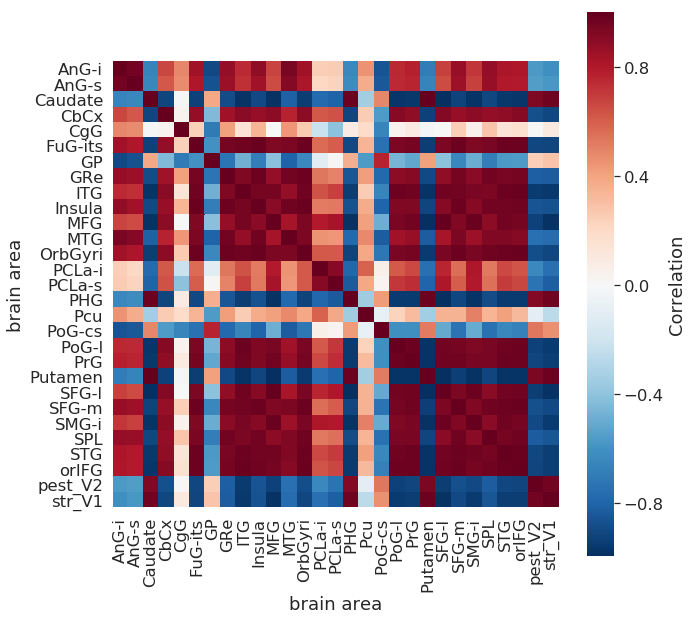

In [23]:
df_normalized = normalize_data(df_data) # Normalize the dataframe by subtracting the mean with the function we just created
corr_areas = df_normalized.corr()
plt.figure(figsize=(10,10)) # Make a nice big canvas
sns.heatmap(corr_areas, # The data we want a heatmap for.
            xticklabels=True, # Show all the brain areas (x-axis)
            yticklabels=True, # Show all the brain areas (y-axis)
            cmap='RdBu_r', # Use the red-to-blue divergent color map (white at 0)
            cbar_kws={'label': 'Correlation'}, # Show a colorbar label
            square=True); # Make sure the heatmap is a perfect square

#### We can also cluster that correlation matrix (below), grouping areas that correlated with one another together.  This shows that (at a high-level) the brain has ~ 2 genetic clusters.  One of those clusters (the bigger one: Insula, various gyri ending in "G") is mostly cortical structures.  The other is mostly sub-cortical structures (the smaller one: caudate, putamen, etc.)

<Figure size 720x720 with 0 Axes>

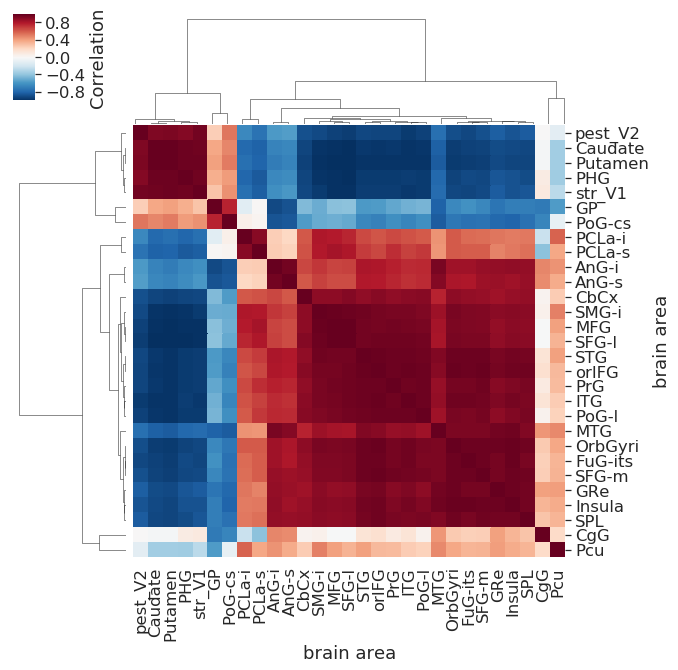

In [24]:
plt.figure(figsize=(10,10)); # Make a nice big canvas
sns.clustermap(corr_areas, # The data we want a heatmap for.
            xticklabels=True, # Show all the brain areas (x-axis)
            yticklabels=True, # Show all the brain areas (y-axis)
            cmap='RdBu_r', # Use the red-to-blue divergent color map (white at 0)
            cbar_kws={'label': 'Correlation'}, # Show a colorbar label
            square=True);

#### Now what about the genes? Plotting such a clustermap of all of the genes is sort of impractical, because the correlation matrix is about 20,000 x 20,000 elements! But we can still compute the correlation matrix.  It just takes a few seconds...

### 7) We want to compute the correlation now across rows (genes) instead of across columns (brain areas). An easy way to do that is to *transpose* the data matrix, which means swapping the rows and columns.  Do that with the `.T` method.  

#### But let's also avoid creating a 20,000 x 20,000 matrix (with 400,000,000 points) which will take some time to compute.  Instead let's just keep every 10th gene.  We can do that using `.iloc[::10]` on our mean data frame, which keeps only every 10th row (resulting in 10x10 = 100 times fewer total data points in the correlation matrix).  I am just going to do that for you so that you don't crash your notebook!

In [25]:
def correlation_between_genes(df):
    df_mean = df.groupby(level=0, axis=1).mean() 
    df_mean = df_mean.iloc[::10]
    # We can skip the part where we subtract the mean, since brain areas don't vary 
    # nearly as much in total gene expression as genes do.  
    # YOUR CODE HERE
    return df_mean.T.corr()
    raise NotImplementedError()
    
correlation_between_genes(df_data).head()

gene,A1BG,AACS,AANAT,ABCA1,ABCA6,ABCB7,ABCC4,ABCD4,ABHD1,ABHD16A,...,ZNF816,ZNF833P,ZNF846,ZNF879,ZNFX1,ZNRF4,ZRANB3,ZSCAN21,ZSWIM3,ZXDB
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,-0.646122,-0.195948,0.756975,0.112220,0.033586,0.132601,0.369442,0.606589,-0.377445,...,0.010773,-0.414438,0.161441,-0.167436,0.105833,-0.298412,-0.448878,-0.069141,-0.533901,-0.493760
AACS,-0.646122,1.000000,0.361197,-0.796012,-0.402446,-0.432613,-0.009813,-0.767024,-0.772303,0.482518,...,-0.339556,0.494500,-0.375545,-0.251521,-0.595227,0.630618,0.697975,-0.378148,0.361116,0.229686
AANAT,-0.195948,0.361197,1.000000,-0.510868,-0.162312,-0.004085,-0.204784,0.018175,-0.258092,0.354812,...,0.036390,0.372621,-0.142543,0.098091,-0.102753,0.296031,-0.040884,0.148567,0.276558,0.136511
ABCA1,0.756975,-0.796012,-0.510868,1.000000,0.054537,-0.014426,0.387509,0.318529,0.771773,-0.695241,...,-0.093911,-0.599821,0.098457,-0.248734,0.186537,-0.434515,-0.441000,-0.167748,-0.685264,-0.563055
ABCA6,0.112220,-0.402446,-0.162312,0.054537,1.000000,0.810333,-0.286696,0.638078,-0.018399,0.416030,...,0.806759,0.254496,0.778492,0.785896,0.738266,-0.420326,-0.117593,0.682232,0.450496,0.580138


In [26]:
corr_genes = correlation_between_genes(df_data)
assert corr_genes.shape == (df_mean.iloc[::10].shape[0], df_mean.iloc[::10].shape[0])

#### We can now cluster the genes' correlation matrix, which will take a few seconds to compute, but looks really cool!

<Figure size 720x720 with 0 Axes>

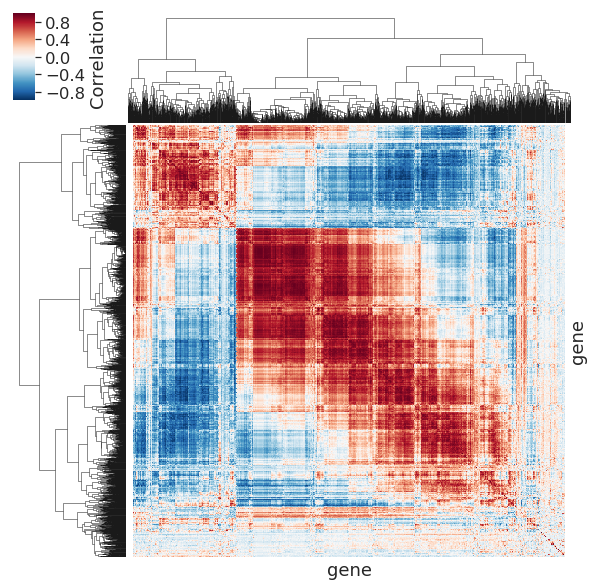

In [27]:
corr_genes = correlation_between_genes(df_data) # Compute the correlation matrix for genes
plt.figure(figsize=(10,10)); # Make a nice big canvas
sns.clustermap(corr_genes, # The data we want a heatmap for.
            xticklabels=False, # Don't show any gene names, since there are too many (x-axis)
            yticklabels=False, # Don't show any gene names, since there are too many  (y-axis)
            cmap='RdBu_r', # Use the red-to-blue divergent color map (white at 0)
            cbar_kws={'label': 'Correlation'}, # Show a colorbar label
            square=True);

#### Now let's project this data down to a reasonable number of dimensions.  

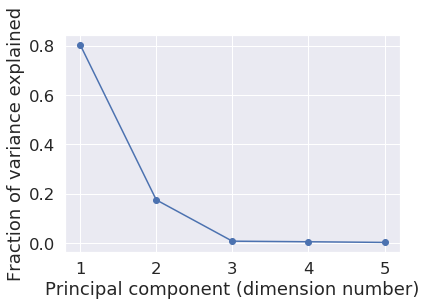

In [28]:
pca = PCA() # Instantiate the PCA class
pca.fit(df_normalized)
plt.plot(range(1,6), pca.explained_variance_ratio_[:5],'-o') # Only show first 5 principal components
plt.xlabel('Principal component (dimension number)')
plt.ylabel('Fraction of variance explained');

### 8) Wow, almost all of the variance in this dataset can be explained by the first two principal components.  Why do you think this is?  Enter your answer in the cell below.  

In [41]:
# YOUR CODE HERE

print("The correlation between the first two principal components shows the highly correlated pattern of gene \
expression. The PCA tells us which dimensions have the most gene expression.")

The correlation between the first two principal components shows the highly correlated pattern of gene expression. The PCA tells us which dimensions have the most gene expression.


### 9) Write a function that returns the fraction of the variance explained by accounting for the first N principal components (where the components are numbered 1, 2, ...).  Use the code above to get most of the way there, and use `.cumsum()` to get a cumulative sum of the explaiened variance.

In [30]:
def cumulative_variance_explained(df, N):
    df_normalized = normalize_data(df)
    pca = PCA()
    pca.fit(df_normalized)
    # Use `pca` and `N` below, taking a hint from the code above.  
    # YOUR CODE HERE
    return pca.explained_variance_ratio_[:N].cumsum()
    raise NotImplementedError()
    
cumulative_variance_explained(df_data, 1)

array([0.8036488])

In [31]:
assert cumulative_variance_explained(df_data, 1) == pca.explained_variance_ratio_[:1]

#### Now we can project brain areas back into the first two principal components (the two most interesting dimensions) of this genetic space.  `pca.transform()`  applys a "rotation" to the data such the highest-variance dimension comes first, the second-highest-variance dimension comes second, etc.  Then we make a scatter plot showing only the first two of these dimensions.

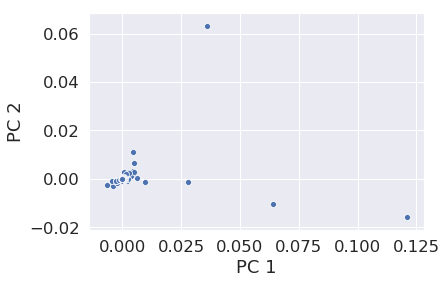

In [32]:
def make_df_transformed(df):
    df_normalized = normalize_data(df_data)
    pca = PCA()
    pca.fit(df_normalized)
    df_transformed = df_normalized.copy()
    transformed = pca.transform(df_normalized)
    column_names = ['PC %d'%i for i in range(1,1+transformed.shape[1])]
    df_transformed = pd.DataFrame(transformed, index=df.index, columns=column_names)
    return df_transformed

df_transformed = make_df_transformed(df_data)
sns.scatterplot(x='PC 1', y='PC 2', data=df_transformed);

#### In the scatter plot above, each dot is one gene.  The dimensions (axes) that they are plotted against correspond to linear combinations of brain areas.  How does each brain area get weighted in such a combination?  Let's find out for principal component #1 (the x-axis above)

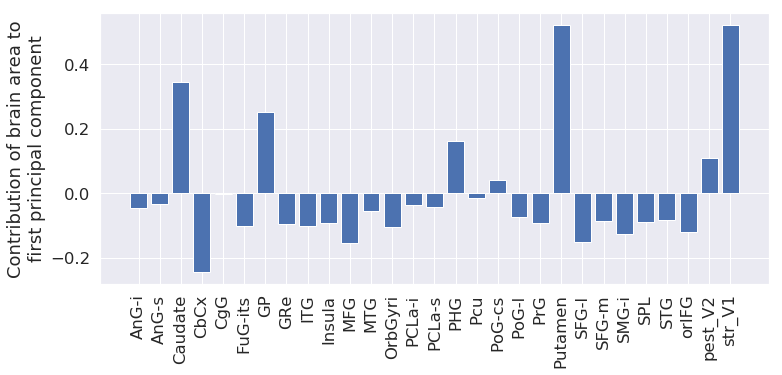

In [33]:
plt.figure(figsize=(12,5))
plt.bar(range(29), pca.components_[0, :])
plt.xticks(range(29), df_normalized.columns, rotation=90);
plt.ylabel('Contribution of brain area to\nfirst principal component');

#### In the bar plot above, the contribution of each brain area to the first principal component is shown.  This means that the location of a gene on the x-axis in the scatter plot before it is determined by that gene's expression in each brain area, weighted by the values in the bar plot above.  Note that "caudate" and "putamen" both have high values, suggesting that the first principal component might be interpreted as "degree of expression in subcortical brain areas".  

### 10) Now we want to identify the genes that stand out in this first principal component (i.e. that take extreme x values in the scatter plot).  The `df_transformed` dataframe still has all the genes as rows.  Write a function that returns a list of the four genes with the highest value in the first principal component (highest x-value in the scatter plot above)

In [34]:
# YOUR CODE HERE
def top_4(df):
    df = df_transformed.sort_values(by = 'PC 1',ascending=False)
    return df
    raise NotImplementedError()


In [35]:
assert top_4(df_data).index[0] == 'MTRNR2L2'

#### You should see that the genes that dominate this principal component (that take extreme values in the first dimension of the transformed space) are the same genes that we saw (in an earlier question) had the highest mean expression in the brain.  In fact, they have high mean expression in the brain precisely because they are highly expressed in the areas that make up the first principal component (subcortical structures).  Their level of expression is unremarkable in other areas.  

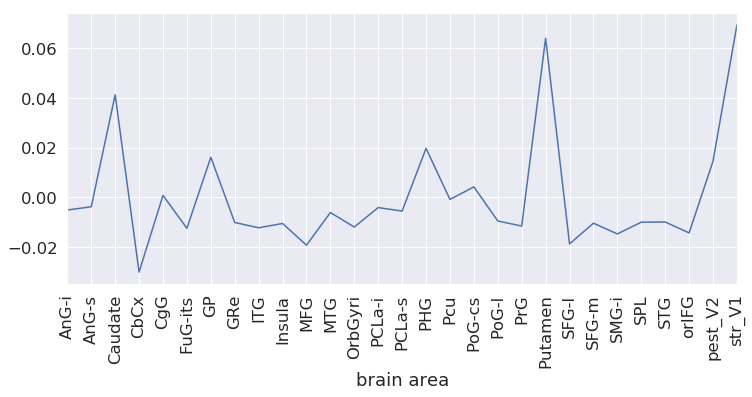

In [36]:
plt.figure(figsize=(12,5))
df_normalized.loc['MTRNR2L2'].plot() # Plot expression for this one gene
plt.xticks(range(29), df_normalized.columns, rotation=90);